# Predicción de precio por $m^2$ de un inmueble con base en sus características

## Entendimiento del negocio

Se proporciona un conjunto de datos que enlista una serie de inmuebles con sus características geoespaciales y amenidades, el objetivo es poder predecir el precio por $m^2$. Los datos han sido extraídos de diversas páginas de anunciantes de inmuebles que se pueden encontrar en Internet. La metodología planteada para resolver este problema es la propuesta por IMB llamada CRISP-DM.
En este cuaderno se puede encontrar de forma detallada la elaboración de la metodología a seguir para este proyecto y la base de la automatización de un nuevo conjunto de datos.

In [1]:
# librerías
# análisis de datos
import pandas as pd
import numpy as np
# graficación
import matplotlib.pyplot as plt
import seaborn as sns
# pruebas estadísticas
import statsmodels.api as sm
from scipy import stats

In [2]:
data = pd.read_csv('reto_precios.csv')

## Entendimiento de los datos

In [3]:
# descripción del tipo de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   main_name             981 non-null    object 
 1   subtitle              981 non-null    object 
 2   link                  981 non-null    object 
 3   location              981 non-null    object 
 4   price                 981 non-null    object 
 5   attributes            981 non-null    object 
 6   timestamp             981 non-null    object 
 7   id                    981 non-null    int64  
 8   address               702 non-null    object 
 9   since                 981 non-null    object 
 10  description           981 non-null    object 
 11  vendor                981 non-null    object 
 12  lat                   981 non-null    float64
 13  lon                   981 non-null    float64
 14  price_mod             981 non-null    float64
 15  price_currency        9

In [4]:
# se despliegan los primos 5 registros para conocer el formato de estos
data.iloc[:,10:]

,description,vendor,lat,lon,price_mod,price_currency,since_period,since_value,days_on_site,amenities,...,apartments_per_floor,disposition,parking_lots,floor_situated,orientation,num_bedrooms,department_type,m2,final_price,price_square_meter
0,Garden house con 2 habitaciones y dos baños c...,Investemx,19.421317,-99.164182,9000000.0,pesos,days,5,5.0,3.0,...,NaN,Contrafrente,2,NaN,NaN,2.0,NaN,127.0,9000000.0,70866.141732
1,Mezcla perfecta entre E S T I L O y C A L I D ...,Avitana,19.421029,-99.163541,4264000.0,pesos,days,7,7.0,2.0,...,NaN,NaN,1,NaN,NaN,1.0,NaN,54.0,4264000.0,78962.962963
2,"Concepto único en Roma Sur, es un desarrollo d...",Ebranuncios,19.407814,-99.161872,8093500.0,pesos,days,4,4.0,NaN,...,NaN,NaN,2,NaN,NaN,3.0,NaN,163.0,8093500.0,49653.374233
3,[VEN] ID HM: 40395.En Houm hacemos todo más fá...,Houm,19.404992,-99.160243,4000000.0,pesos,months,5,150.0,2.0,...,NaN,NaN,1,NaN,Oeste,2.0,Loft,93.0,4000000.0,43010.752688
4,"La mejor opción en Roma Norte, sólo 7 departam...",Contactobienesraicesgold,19.419693,-99.156036,6732700.0,pesos,days,52,52.0,4.0,...,NaN,NaN,1,NaN,NaN,2.0,NaN,103.0,6732700.0,65366.019417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,Departamento en preventa.,Coldwellbankerarsespacio,19.405777,-99.161068,6385000.0,pesos,days,40,40.0,NaN,...,NaN,NaN,2,NaN,NaN,2.0,NaN,140.0,6385000.0,45607.142857
977,Departamento en Preventa.,Coldwellbankerarsespacio,19.405777,-99.161068,4116000.0,pesos,days,40,40.0,NaN,...,NaN,NaN,1,NaN,NaN,2.0,NaN,84.0,4116000.0,49000.000000
978,Departamento en Preventa.,Coldwellbankerarsespacio,19.405777,-99.161068,4236000.0,pesos,days,40,40.0,NaN,...,NaN,NaN,1,NaN,NaN,2.0,NaN,88.0,4236000.0,48136.363636
979,Excelentes departamentos en venta en la coloni...,Coldwellbankerpremium,19.414845,-99.160241,6620120.0,pesos,months,2,60.0,NaN,...,NaN,NaN,2,NaN,NaN,2.0,NaN,114.0,6620120.0,58071.228070


Primero, describimos los campos que contiene la tabla y el tipo de dato que contiene con el fin de conocer la información:

1.	main_name: object nombre del anuncio

2.	subtitle: object tipo de anuncio

3.	link: link del anuncio

4.	location: object dirección del inmueble

5.	price: object precio de lista en pesos

6.	attributes: object  metros cuadrados y número de recámaras

7.	timestamp: object fecha

8.	id:int64  id del registro

9.	address: object dirección/ubicación del inmueble

10.	since: object fecha de publición y anunciante

11.	description: object descripción del inmueble o anuncio

12.	vendor: object nombre del vendedor

13.	lat: float64 latitud 

14.	lon: float64 longitud

15.	price_mod: float64 precio

16.	price_currency: object moneda

17.	since_period: object perdio de tiempo en días, semanas, etc desde el anuncio

18.	since_value: int64  número de días, semanas, desde el anuncio

19.	days_on_site: float64 días desde la fecha de publicación

20.	amenities: float64 número de amenidades, es decir de facilidades que proporciona el inmueble, como alberca, lobby, seguridad, etc.

21.	age_in_years: float64 antiguedad del departamento en años

22.	bathrooms: float64 número de baños

23.	cellars: float64 número de bodegas 

24.	num_floors: float64 número de pisos donde se tiene un departamento en renta

25.	monthly_fee: object impuesto mensual

26.	apartments_per_floor: float64 número de departamentos por piso disponibles en el edificio

27.	disposition: object disposición del departamento, frente si da a la calle, interno si no da a la calle y contrafente si esta ubicado en la parte trasera del edificio

28.	parking_lots: int64 número de lugares de estacionamiento

29.	floor_situated: float64 piso en el que se encuentra

30.	orientation: object orientación

31.	num_bedrooms: float64 número de cuartos

32.	department_type: object tipo de departamentos, contiene solo tipo 'loft'

33.	m2: float64 metros cuadrados del departamento

34.	final_price: float64 suma de precio_mod + monthly_fee

35.	price_square_meter: float6 precio por metro cuadrado

## Preparación de los datos

En esta sección, se hará un esfuerzo para mejorar la comprensión de los datos realizando exploraciones estadísticas y numéricas para visualizar mejor la información que se tiene. El objetivo de esta sección es tener un conocimiento de la estructura
del modelo de datos, la información que contiene la tabla y conocer más a fondo qué contienen cada registros (departamento en renta), para posteriormente continuar con la propuesta de variables que alimenten al modelo.

In [5]:
# notemos que el calculo del precio final es igual al precio listado, por lo tanto sólo se utiliza un campo de los dos
# esto pues final_price se calcula a partir de price_mod por lo que solo debe ser considerado alguna  de las dos
data[['final_price','price_mod']].corr()

,final_price,price_mod
final_price,1.0,1.0
price_mod,1.0,1.0


In [6]:
# Primero obtenemos los nombres las las columnas categóricas y numéricas
# Se excluyen la columna id, final_price
# Veamos que price_square_meter se calcula a partir del precio final y el núm de m2, por lo tanto se descarta
# since_value  se descarta pues solo consideraremos los días desde la fecha de publicación
# col_num=numéricas
col_num=data.drop(['id','price_square_meter','final_price','since_value'], axis=1).select_dtypes(exclude=['object']).columns.tolist()
# ahora veremos los valores nulos que se tienen en el data set para estas variables 
data[col_num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lat                   981 non-null    float64
 1   lon                   981 non-null    float64
 2   price_mod             981 non-null    float64
 3   days_on_site          981 non-null    float64
 4   amenities             504 non-null    float64
 5   age_in_years          981 non-null    float64
 6   bathrooms             981 non-null    float64
 7   cellars               52 non-null     float64
 8   num_floors            84 non-null     float64
 9   apartments_per_floor  15 non-null     float64
 10  parking_lots          981 non-null    int64  
 11  floor_situated        24 non-null     float64
 12  num_bedrooms          981 non-null    float64
 13  m2                    981 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 107.4 KB


In [7]:
# conteo de porcentaje de valores nulos en campos numericos y de valores 
for i in col_num:
    print()
    print('*** columna: \'{}\' ***'.format(i))
    porcentaje_nulos = data[i].isnull().mean() * 100
    print('valores nulos: ',porcentaje_nulos,'%')
    print()
    print(data[i].value_counts())


*** columna: 'lat' ***
valores nulos:  0.0 %

19.405299    99
19.419526    69
19.410923    51
19.419526    47
19.410925    42
             ..
19.412720     1
19.406299     1
19.418998     1
19.402056     1
19.418418     1
Name: lat, Length: 322, dtype: int64

*** columna: 'lon' ***
valores nulos:  0.0 %

-99.162549     116
-99.164989      51
-99.165172      51
-99.164989      48
-99.165164      42
              ... 
-99.158933       1
-99.166006       1
-117.063962      1
-99.159086       1
-99.156037       1
Name: lon, Length: 316, dtype: int64

*** columna: 'price_mod' ***
valores nulos:  0.0 %

4495000.0     9
2980000.0     8
4369000.0     8
7040000.0     8
6790000.0     7
             ..
3516884.0     1
9689000.0     1
1020000.0     1
5069400.0     1
10174465.0    1
Name: price_mod, Length: 623, dtype: int64

*** columna: 'days_on_site' ***
valores nulos:  0.0 %

60.0     157
35.0     114
7.0       92
365.0     63
90.0      55
300.0     52
56.0      42
120.0     33
4.0       29
24

In [8]:
# verifiquemos que todos los registros pertenezcan a la ciudad de México
data.drop(data[data['lat'] > 20].index, inplace=True)


In [9]:
data

,main_name,subtitle,link,location,price,attributes,timestamp,id,address,since,...,apartments_per_floor,disposition,parking_lots,floor_situated,orientation,num_bedrooms,department_type,m2,final_price,price_square_meter
0,Departamento - Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Sinaloa 20 , Roma Sur, Roma Sur, Cuauhtémoc, D...",9000000 pesos,"127 m² construidos,2 recs.",2022-03-29,1,"Sinaloa 20 , Roma Sur",Publicado hace 5 días,...,NaN,Contrafrente,2,NaN,NaN,2.0,NaN,127.0,9000000.0,70866.141732
1,Preventa Exclusiva · Terraloza Roma Norte ·,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tonala, Roma Norte, Cuauhtémoc, Distrito Federal",4264000 pesos,"54 m² construidos,1 rec.",2022-03-29,2,Tonala,Publicado hace 7 días,...,NaN,NaN,1,NaN,NaN,1.0,NaN,54.0,4264000.0,78962.962963
2,Townhouse Único En La Roma Sur,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...",8093500 pesos,"163 m² construidos,3 recs.",2022-03-29,3,"Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...",Publicado hace 4 días,...,NaN,NaN,2,NaN,NaN,3.0,NaN,163.0,8093500.0,49653.374233
3,"Departamento En Roma Sur, Cuauhtémoc Con 2 Rec...",Departamento en venta,https://departamento.metroscubicos.com/MLM-132...,"Linares, Roma Sur, Cuauhtémoc, Distrito Federal",4000000 pesos,"93 m² construidos,2 recs.",2022-03-29,4,Linares,Publicado hace 5 meses por {action},...,NaN,NaN,1,NaN,Oeste,2.0,Loft,93.0,4000000.0,43010.752688
4,Últimos Deptos En Preventa En Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-137...,"Frontera, Roma Norte, Cuauhtémoc, Distrito Fed...",6732700 pesos,"103 m² construidos,2 recs.",2022-03-29,5,Frontera,Publicado hace 52 días,...,NaN,NaN,1,NaN,NaN,2.0,NaN,103.0,6732700.0,65366.019417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,Monterrey 101,Departamento en venta,https://departamento.metroscubicos.com/MLM-138...,"Monterrey, Roma Sur, Cuauhtémoc, Distrito Federal",6385000 pesos,"140 m² construidos,2 recs.",2022-03-29,981,Monterrey,Publicado hace 40 días,...,NaN,NaN,2,NaN,NaN,2.0,NaN,140.0,6385000.0,45607.142857
977,Monterrey 302,Departamento en venta,https://departamento.metroscubicos.com/MLM-138...,"Monterrey, Roma Sur, Cuauhtémoc, Distrito Federal",4116000 pesos,"84 m² construidos,2 recs.",2022-03-29,982,Monterrey,Publicado hace 40 días,...,NaN,NaN,1,NaN,NaN,2.0,NaN,84.0,4116000.0,49000.000000
978,Monterrey 201,Departamento en venta,https://departamento.metroscubicos.com/MLM-138...,"Monterrey, Roma Sur, Cuauhtémoc, Distrito Federal",4236000 pesos,"88 m² construidos,2 recs.",2022-03-29,983,Monterrey,Publicado hace 40 días,...,NaN,NaN,1,NaN,NaN,2.0,NaN,88.0,4236000.0,48136.363636
979,Departamento En Venta La Roma,Departamento en venta,https://departamento.metroscubicos.com/MLM-136...,"Querétaro, Roma Norte, Cuauhtémoc, Distrito Fe...",6620120 pesos,"114 m² construidos,2 recs.",2022-03-29,984,Querétaro,Publicado hace 2 meses,...,NaN,NaN,2,NaN,NaN,2.0,NaN,114.0,6620120.0,58071.228070


In [10]:
# las columnas lon, lat, price_mod se van a considerar como variables numéricas continuas

# para la columna days_on_site se hara uso de la distribución para considerar si se transforma en 
# variable categórica o se mantiene como variable continua

# Notemos que la columna 'amenities' solo contiene ocho valores distintos de tipo entero, 
# por lo que se puede considerar transformar en una variable de tipo categórico

# Todos los valores de la columna age_in_years son cero, por esto noo se utilizará en el modelo

# Para la columna bathrooms se tienen seis tipos de datos distintos, por lo que puede considerarse como categórica
# se va a verificar si el dato de tener 23 baños es correcto

# La columna cellars que contiene el número de bodegas solo contiene dos tipos de registros, una y dos bodegas
# sin embargo, como se tiene un porcentaje muy significativo de valores nulos y no existe una forma de rescatar la información
# no se utilizará en el modelo

# la variable num_floors contine un gran porcentaje de valores nulos, pero representa cuantos departamentos 
# se tienen en el inmueble, por tanto no será utilizada

# El número de lugares de estacionamiento es uno, dos o tres a lo mucho, se analiza tomarla como tipo categórico

# floor_situated se considera como categórica 

# num_bedrooms se considera como categórica 

# Por último, m2 se va a considerar como variable continua

In [11]:
# Un problema que se tiene es la cantidad de valores faltantes en amenities
# se hará la supoción de que si el anunciante no menciona alguna amedidad es por que
# el inmueble no cuenta con ninguna, así los valores nulos 
data['amenities'].fillna(0, inplace=True)

In [12]:
# Para la columna bathrooms se tienen seis tipos de datos distintos, por lo que puede considerarse como categórica
# Primero revisemos que el registro que tenga 23 baños sea correcto
index = data['bathrooms'].idxmax()
print(index)

687


In [13]:
# se buscó el anunciante y se conluye que el dato correcto es 2 baños, no 23, se realiza esta correción
data.iloc[index,:]

main_name               Departamento En Chapultepec 182,col.roma,cuauh...
subtitle                                            Departamento en venta
link                    https://departamento.metroscubicos.com/MLM-135...
location                                     Cuauhtémoc, Distrito Federal
price                                                        839652 pesos
attributes                                      70 m² construidos,2 recs.
timestamp                                                      2022-03-29
id                                                                    709
address                                                               NaN
since                                              Publicado hace 3 meses
description             N O .. C R É D I T O S INMUEBLE EN ¨REMATE BAN...
vendor                                          Consultores Patrimoniales
lat                                                               19.4246
lon                                   

In [14]:
# se reemplaza el valor por el dato correcto
data['bathrooms'] = data['bathrooms'].replace(23,2)
# y verificamos que se halla realizado el cambio
data['bathrooms'][index] 

2.0

In [15]:
# ahora se trabajará con las variables categoricas
# no se consideran:
# 'main_name','subtitle', pues es el nombre del anuncio y la categoría
# 'link' no se utilizará como variable
# 'location','address' pues ya se tiene los campos de longitud y latitud que ubican el inmueble
# 'price','attributes','since', 'since_period' pues ya existen otros campos que considerarn esta información de forma numérica
col_cat=data.drop(['main_name','subtitle','link','location','price','attributes','address','since','since_period'], axis=1).select_dtypes(['object']).columns.tolist()
data[col_cat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 980
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        944 non-null    object
 1   description      944 non-null    object
 2   vendor           944 non-null    object
 3   price_currency   944 non-null    object
 4   monthly_fee      119 non-null    object
 5   disposition      19 non-null     object
 6   orientation      8 non-null      object
 7   department_type  39 non-null     object
dtypes: object(8)
memory usage: 106.4+ KB


In [16]:
# conteo de porcentaje de valores nulos
for i in col_cat:
    print('*** columna: \'{}\' ***'.format(i))
    porcentaje_nulos = data[i].isnull().mean() * 100
    print('valores nulos: ',round(porcentaje_nulos,2),'%')
    print()

*** columna: 'timestamp' ***
valores nulos:  0.0 %

*** columna: 'description' ***
valores nulos:  0.0 %

*** columna: 'vendor' ***
valores nulos:  0.0 %

*** columna: 'price_currency' ***
valores nulos:  0.0 %

*** columna: 'monthly_fee' ***
valores nulos:  87.39 %

*** columna: 'disposition' ***
valores nulos:  97.99 %

*** columna: 'orientation' ***
valores nulos:  99.15 %

*** columna: 'department_type' ***
valores nulos:  95.87 %



In [17]:
# analicemos el tipo de datos que se tienen en la columna vendor
data['vendor'].value_counts()
# notemos que se tienen muchos registros por lo cual no es conveniente tomarla como categorica
# es por eso que se va a tomar como TopVendor si tiene más de cierta cantidad de anuncios

Metros Cuadrados Expertos    115
Rent A House Cdmx            111
Buscatuhogarmexico            96
Bienesraiceslomelin           42
Houm                          39
                            ... 
Distritocapitalcondesa         1
Century 21covarrubias          1
Xlife Real Estate              1
Almanza Inmobiliaria           1
Contactobienesraicesgold       1
Name: vendor, Length: 121, dtype: int64

In [18]:
# Calcular la frecuencia de cada valor en la columna
frecuencias = data['vendor'].value_counts()

# Calcular el porcentaje que representa cada valor respecto al total de registros
porcentajes = frecuencias / len(data) * 100

porcentajes
# notamos que tres registros acumulan al menos 30% del porcentaje total de anuncios
# esto se logra al tener más de 96 ventas  por lo tanto dichos registros se considerarn como
# top vendedores 

Metros Cuadrados Expertos    12.182203
Rent A House Cdmx            11.758475
Buscatuhogarmexico           10.169492
Bienesraiceslomelin           4.449153
Houm                          4.131356
                               ...    
Distritocapitalcondesa        0.105932
Century 21covarrubias         0.105932
Xlife Real Estate             0.105932
Almanza Inmobiliaria          0.105932
Contactobienesraicesgold      0.105932
Name: vendor, Length: 121, dtype: float64

In [19]:
# lo anterior se realiza con el siguiente código
data['top_vendor'] = data['vendor'].map(lambda x: True if frecuencias[x] > 96 else False)

In [20]:
# notemos que todos los precios están en moneda nacional 
# por tanto no es necesario realizar ninguna conversión y no se utilizará este campo
data['price_currency'].value_counts()

pesos    944
Name: price_currency, dtype: int64

In [21]:
# veamos los valores que se tienen en la columna de monthly_fee
data['monthly_fee'].value_counts()
# Notemos que esta información contribuye a que la variable de price_mod y final_price sean iguales pues 
# final_price = price_mod + monthly_fee
# es por ello, que sólo se utilizará price_mod

0 MXN       101
1 MXN         5
4 MXN         2
2000 MXN      2
800 MXN       1
1500 MXN      1
2900 MXN      1
4000 MXN      1
3700 MXN      1
2500 MXN      1
3000 MXN      1
853 MXN       1
3900 MXN      1
Name: monthly_fee, dtype: int64

In [22]:
# veamos los valores que contiene la columna de disposición
# esta variable sería interesante de analizar, por el momento no se centrara en hallar los datos faltantes
# una propuesta para poder completar esta información analizando la imagen del departamento y clasifcarla
data['disposition'].value_counts()

Frente          12
Interno          4
Contrafrente     3
Name: disposition, dtype: int64

In [23]:
# prientación del departamento 
data['orientation'].value_counts()

Poniente    3
Sur         2
Oriente     1
Norte       1
Oeste       1
Name: orientation, dtype: int64

In [24]:
# Se observa que para el tipo de departamento sólo se tiene de tipo loft
# tradicionalmente se sabe que un loft puede elevar el precio de un departamento,
# es por ello que esta columna se utilizará para crear una vaRibles de tipo booleana
# que indique si es loft o no
data['department_type'].value_counts()

Loft    39
Name: department_type, dtype: int64

##  Construcción de Analytical Base Table (ABT)

In [25]:
# Creamos la tabla analytics basic table la cual será la tabla con la que se estará trabajando
# primero guardamos las columnas a las que no se les aplicará ninguna transformación
ABT = data[['id', 'price_mod','lon', 'lat','days_on_site','m2','bathrooms','amenities','parking_lots','num_bedrooms','top_vendor']]
# se promueve la columna 'id' como índice de la tabla
ABT = ABT.set_index('id')

In [26]:
# visualicemos la tabla que se acaba de crear
ABT

,price_mod,lon,lat,days_on_site,m2,bathrooms,amenities,parking_lots,num_bedrooms,top_vendor
id,,,,,,,,,,
1,9000000.0,-99.164182,19.421317,5.0,127.0,2.0,3.0,2,2.0,False
2,4264000.0,-99.163541,19.421029,7.0,54.0,1.0,2.0,1,1.0,False
3,8093500.0,-99.161872,19.407814,4.0,163.0,3.0,0.0,2,3.0,False
4,4000000.0,-99.160243,19.404992,150.0,93.0,2.0,2.0,1,2.0,False
5,6732700.0,-99.156036,19.419693,52.0,103.0,2.0,4.0,1,2.0,False
...,...,...,...,...,...,...,...,...,...,...
981,6385000.0,-99.161068,19.405777,40.0,140.0,2.0,0.0,2,2.0,False
982,4116000.0,-99.161068,19.405777,40.0,84.0,2.0,0.0,1,2.0,False
983,4236000.0,-99.161068,19.405777,40.0,88.0,2.0,0.0,1,2.0,False


In [27]:
# Esta será la tabla con la cual se hará el modelo, entonces, realicemos algunas pruebas estadísticas para
# visualizar la información y conocer qué algoritmos y métricas serían adecuados
ABT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 1 to 985
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price_mod     944 non-null    float64
 1   lon           944 non-null    float64
 2   lat           944 non-null    float64
 3   days_on_site  944 non-null    float64
 4   m2            944 non-null    float64
 5   bathrooms     944 non-null    float64
 6   amenities     944 non-null    float64
 7   parking_lots  944 non-null    int64  
 8   num_bedrooms  944 non-null    float64
 9   top_vendor    944 non-null    bool   
dtypes: bool(1), float64(8), int64(1)
memory usage: 74.7 KB


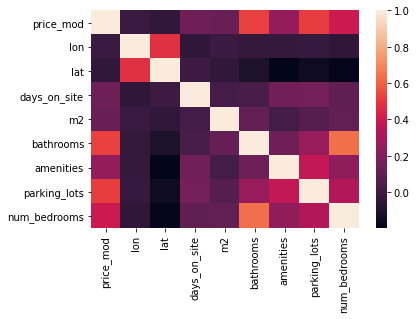

In [28]:
# Primero realicemos un análisis de correlación
matriz_corr = ABT[['price_mod','lon', 'lat','days_on_site','m2','bathrooms','amenities','parking_lots','num_bedrooms']].corr()

sns.heatmap(matriz_corr)
# notamos que no existe mucha correlación entre las variables por lo que no hay variables que sean combinaciones lineales
# y puedan ocasionar ruido al modelo

# las variables que están más correlacionadas son el número de baños, amenidades, lugares de estacionamineto y 
# número de recámaras con el precio, inclusive más que con la cantidad de metros cuadrados.

In [29]:
# Convertimos las varibles numericas que se acumulan en pocos valores, a categóricas
#ABT['bathrooms'] = ABT['bathrooms'].astype('object')
#ABT['amenities'] = ABT['amenities'].astype('object')
#ABT['parking_lots'] = ABT['parking_lots'].astype('object')
#ABT['num_bedrooms'] = ABT['num_bedrooms'].astype('object')

In [30]:
col_cat_ABT=ABT.select_dtypes(['object']).columns.tolist()
col_cat_ABT

[]

In [31]:
# se analiza el comportamiento de cada variable
for i in col_cat_ABT:
    plt.hist(ABT[i])
    plt.xlabel(i)
    plt.ylabel('Frecuencia')
    plt.title('Histograma de {}'.format(i))
    plt.show()    

##########################  price_mod ########################## 


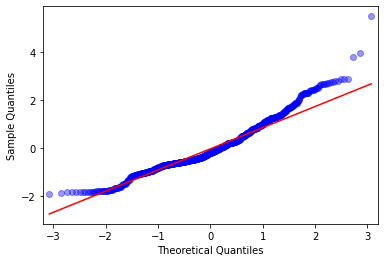

##########################  lon ########################## 


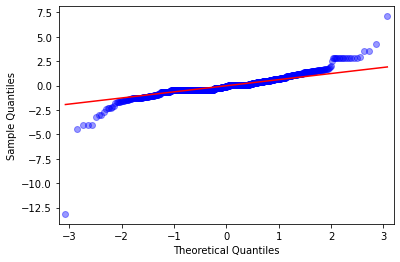

##########################  lat ########################## 


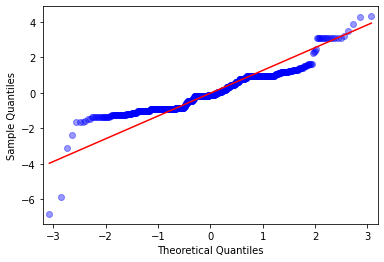

##########################  days_on_site ########################## 


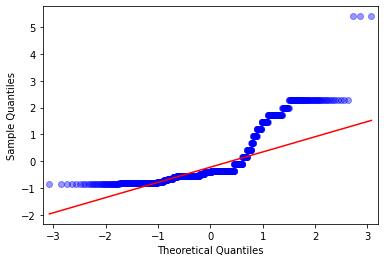

##########################  m2 ########################## 


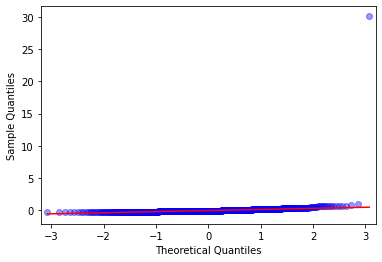

##########################  bathrooms ########################## 


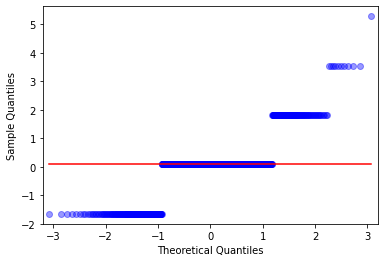

##########################  amenities ########################## 


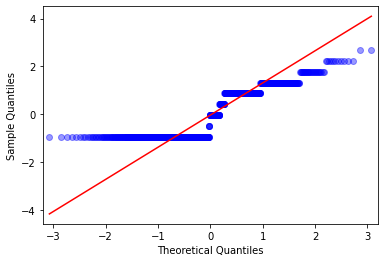

##########################  parking_lots ########################## 


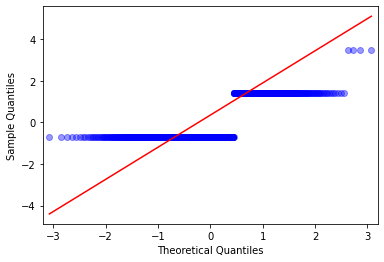

##########################  num_bedrooms ########################## 


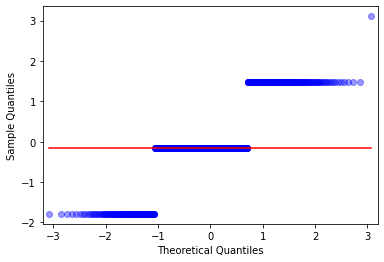

In [32]:
# Nos interesa saber a que distribución se parecen más, las distribuciones de las columnas.
# Para ello usamos los qq-plots, este tipo de plots, están en la librería stats models
# hacemos los qq-plots de las columnas numericas, mientras los puntos azules, me parezcan
# más a la linea roja, la variable tendra más similitud a una normal con los mismos parametros
# que la muestra. Es una forma visual de saber si algo se compart normal
col_num_ABT = ABT.select_dtypes(exclude=['object','bool']).columns.tolist()
for i in col_num_ABT:
    print('##########################  %s ########################## '%i)
    sm.qqplot( ABT[i], fit   = True, line  = 'q', alpha = 0.4, lw    = 2)
    plt.show()
    
# notemos que price_mod se asemeja de forma de la identida, por lo que hay sospecha de relación lineal
# hagamos el mismo análisis pero ahora removiendo outliers

##########################  price_mod ########################## 


count    9.440000e+02
mean     6.220946e+06
std      2.927177e+06
min      6.342170e+05
25%      4.369000e+06
50%      5.653287e+06
75%      7.860470e+06
max      2.233000e+07
Name: price_mod, dtype: float64

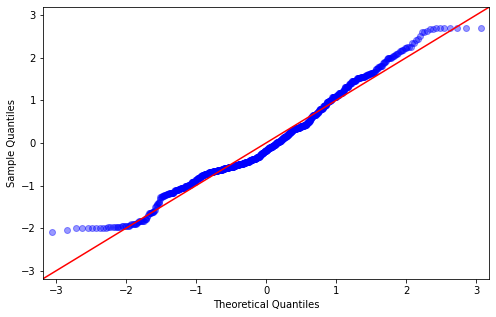

##########################  lon ########################## 


count    944.000000
mean     -99.163070
std        0.004841
min      -99.226707
25%      -99.165164
50%      -99.163366
75%      -99.161073
max      -99.128642
Name: lon, dtype: float64

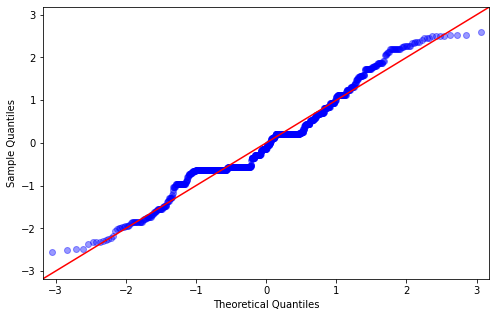

##########################  lat ########################## 


count    944.000000
mean      19.412402
std        0.007598
min       19.360533
25%       19.405598
50%       19.411426
75%       19.418751
max       19.445100
Name: lat, dtype: float64

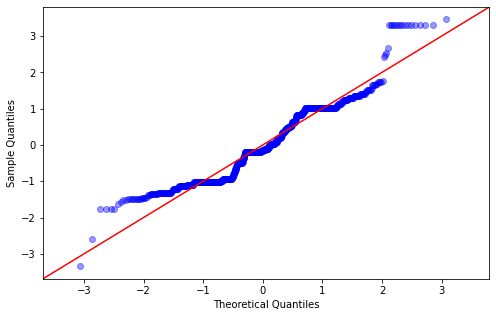

##########################  days_on_site ########################## 


count    944.000000
mean     101.537076
std      116.390185
min        1.000000
25%       31.000000
50%       56.000000
75%      120.000000
max      730.000000
Name: days_on_site, dtype: float64

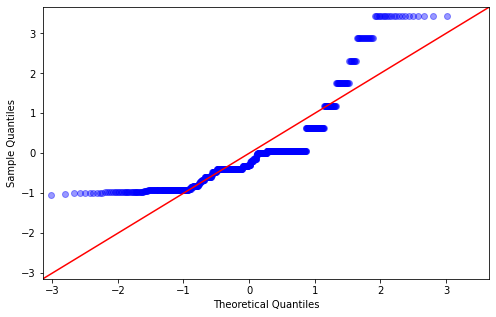

##########################  m2 ########################## 


count     944.000000
mean      112.521727
std       235.900435
min        31.000000
25%        75.000000
50%        93.000000
75%       129.250000
max      7210.000000
Name: m2, dtype: float64

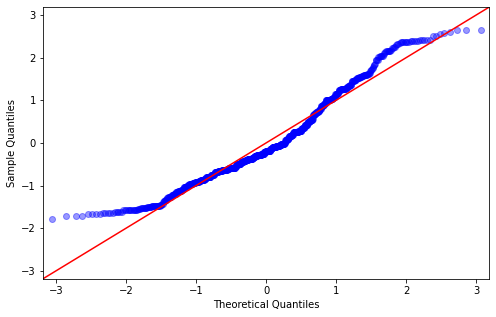

##########################  bathrooms ########################## 


count    944.000000
mean       1.955508
std        0.577165
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        5.000000
Name: bathrooms, dtype: float64

C:\Users\Marco\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:237: RuntimeWarning: invalid value encountered in true_divide
  return (self.sorted_data-self.loc)/self.scale


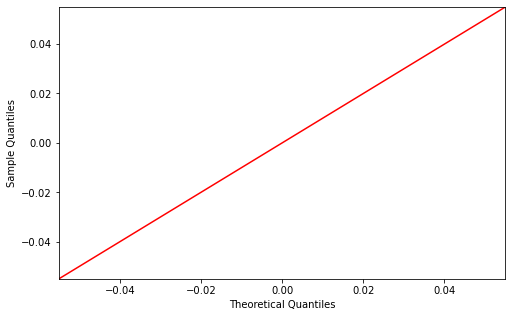

##########################  amenities ########################## 


count    944.000000
mean       2.070975
std        2.207729
min        0.000000
25%        0.000000
50%        2.000000
75%        4.000000
max        8.000000
Name: amenities, dtype: float64

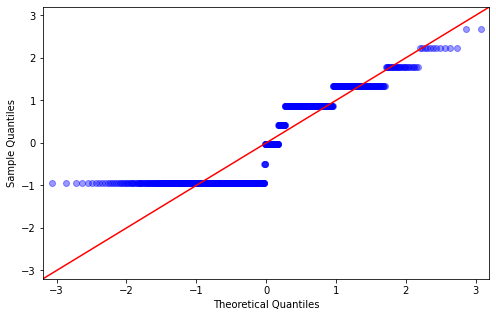

##########################  parking_lots ########################## 


count    944.000000
mean       1.332627
std        0.480318
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: parking_lots, dtype: float64

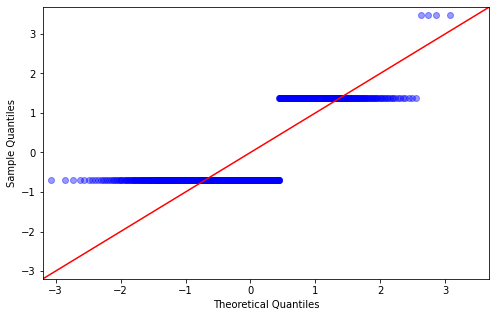

##########################  num_bedrooms ########################## 


count    944.000000
mean       2.096398
std        0.612894
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: num_bedrooms, dtype: float64

C:\Users\Marco\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:237: RuntimeWarning: invalid value encountered in true_divide
  return (self.sorted_data-self.loc)/self.scale


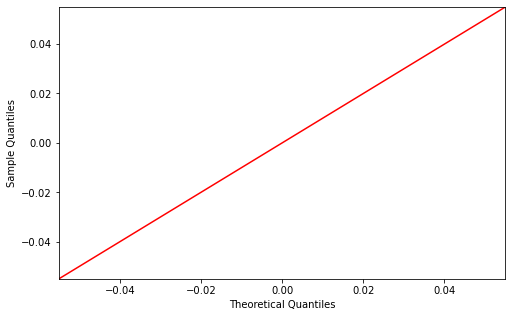

In [33]:
for i in col_num_ABT:
    print('##########################  %s ########################## '%i)
    display(ABT[i].describe())
    plt.rcParams['figure.figsize']=(8,5)
    Q1 = ABT[i].quantile(0.25)
    Q3 = ABT[i].quantile(0.75)
    IQR = Q3 - Q1
    filter = (ABT[i] >= Q1 - 1.5 * IQR) & (ABT[i] <= Q3 + 1.5 *IQR)
    sm.qqplot( ABT.loc[filter][i].dropna(), fit   = True, line  = '45', alpha = 0.4, lw    = 2)    
    plt.show()
    
# Con esto notamos que la distribución de price_mod y m2 se asemejan más a una normal al remover outliers
# la forma de latitud, longitud también mejora ligeramente
# de la variable days_on_site no se puede asumir que sigue alguna distribución en particular

In [34]:
# A continuación, se realiza una prueba de hipótesis con el fin de analizar si 
# tiene sentido proponer un modelo de regresión 

#  Anderson-Darling test ####### pvalue > 0.05 entonces es normal
anderson_test = stats.anderson(ABT['m2'], dist='norm')
print("\nAnderson-Darling test:")
print("Test statistic:", anderson_test[0])
print("p-values:", anderson_test[1])

# se puede concluir que hay evidencia de que la variable m2 sigue una distribución normal


Anderson-Darling test:
Test statistic: 228.87275061159175
p-values: [0.574 0.653 0.784 0.914 1.087]


In [35]:
# Una vez realizado este análisis la tabla ABT se va a guardar en otro 
# archivo el cual se va a aplicar los modelos
ABT.to_csv('tabla_abt_modelo.csv', index=False)